Importamos los paquetes necesarios

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

Leemos el dataset original

In [121]:
df = pd.read_csv('../dataset.csv')  # o pd.read_excel(...)
print(f"Dataset cargado: {df.shape[0]} filas × {df.shape[1]} columnas")

Dataset cargado: 21742 filas × 58 columnas


Nos quedamos con las columnas que queremos preprocesar

In [122]:
columns = ['built_year', 'is_exterior', 'has_terrace', 'has_balcony']
df = df[columns]

Vemos la información de cuantos valores nulos tienen

In [123]:
nulls = df.isnull().mean() * 100
print("Porcentage de nulos por columna:")
display(nulls.sort_values(ascending=False))

Porcentage de nulos por columna:


has_balcony    84.725416
has_terrace    56.084997
built_year     54.006071
is_exterior    13.995953
dtype: float64

Todas las columnas tienen valores nulos, por lo tanto, es necesario imputar estos para procesar los datos.

Imputamos ahora las variables binarias: has_balcony, has_terrace e is_exterior. Mostremos primero información sobre estas columnas:


Valores únicos en is_exterior:
is_exterior
VERDADERO    16900
NaN           3043
FALSO         1777
1               22
Name: count, dtype: int64
---------
Valores únicos en has_terrace:
has_terrace
NaN          12194
VERDADERO     9534
1               14
Name: count, dtype: int64
---------
Valores únicos en has_balcony:
has_balcony
NaN          18421
VERDADERO     3319
1                2
Name: count, dtype: int64
---------


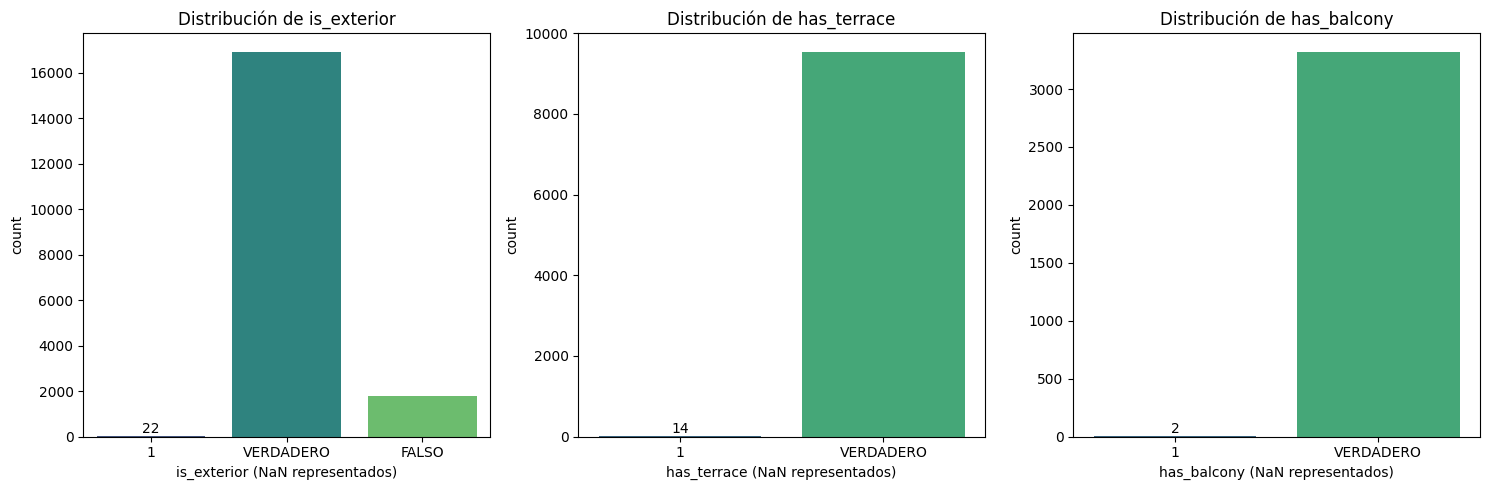

In [124]:
print("Valores únicos en is_exterior:")
print(df['is_exterior'].value_counts(dropna=False))
print('---------')

print("Valores únicos en has_terrace:")
print(df['has_terrace'].value_counts(dropna=False))
print('---------')

print("Valores únicos en has_balcony:")
print(df['has_balcony'].value_counts(dropna=False))
print('---------')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='is_exterior', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Distribución de is_exterior')
axes[0].set_xlabel('is_exterior (NaN representados)')
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x='has_terrace', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Distribución de has_terrace')
axes[1].set_xlabel('has_terrace (NaN representados)')
axes[1].bar_label(axes[1].containers[0])

sns.countplot(x='has_balcony', data=df, ax=axes[2], palette='viridis')
axes[2].set_title('Distribución de has_balcony')
axes[2].set_xlabel('has_balcony (NaN representados)')
axes[2].bar_label(axes[2].containers[0])

plt.tight_layout()
plt.show()

Para los valores nulos en estas variables, creamos una tercera categoría (2) que representa "unknown".
También se puede observar que los "VERDADERO" a veces están representados como 1 o como un booleano, y lo mismo con "FALSO". Por lo tanto, vamos a estandarizar los formatos de la siguiente manera:
- Falso: 0
- Verdadero: 1
- Unknown: 2
Pasamos las columnas al mismo formato de enteros para que no haya confusiones. Sino, el string '1' será diferente al entero 1, aunque representen lo mismo.

In [125]:
df[['is_exterior', 'has_terrace', 'has_balcony']] = df[['is_exterior', 'has_terrace', 'has_balcony']].replace({'VERDADERO': 1, 'FALSO': 0})

df['is_exterior'] = df['is_exterior'].fillna(2)
df['has_terrace'] = df['has_terrace'].fillna(2)
df['has_balcony'] = df['has_balcony'].fillna(2)

df['is_exterior'] = df['is_exterior'].astype(int)
df['has_terrace'] = df['has_terrace'].astype(int)
df['has_balcony'] = df['has_balcony'].astype(int)

Volvemos a mostrar la información de las variables:

Valores únicos en is_exterior:
is_exterior
1    16922
2     3043
0     1777
Name: count, dtype: int64
---------
Valores únicos en has_terrace:
has_terrace
2    12194
1     9548
Name: count, dtype: int64
---------
Valores únicos en has_balcony:
has_balcony
2    18421
1     3321
Name: count, dtype: int64
---------


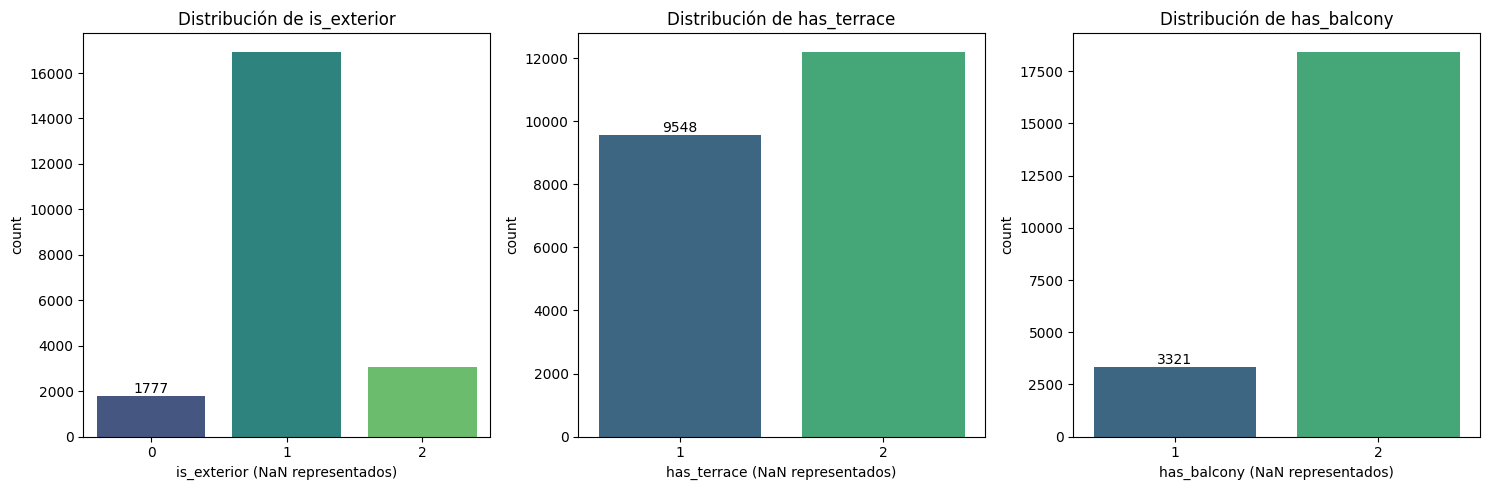

In [126]:
print("Valores únicos en is_exterior:")
print(df['is_exterior'].value_counts(dropna=False))
print('---------')

print("Valores únicos en has_terrace:")
print(df['has_terrace'].value_counts(dropna=False))
print('---------')

print("Valores únicos en has_balcony:")
print(df['has_balcony'].value_counts(dropna=False))
print('---------')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='is_exterior', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Distribución de is_exterior')
axes[0].set_xlabel('is_exterior (NaN representados)')
axes[0].bar_label(axes[0].containers[0])

sns.countplot(x='has_terrace', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Distribución de has_terrace')
axes[1].set_xlabel('has_terrace (NaN representados)')
axes[1].bar_label(axes[1].containers[0])

sns.countplot(x='has_balcony', data=df, ax=axes[2], palette='viridis')
axes[2].set_title('Distribución de has_balcony')
axes[2].set_xlabel('has_balcony (NaN representados)')
axes[2].bar_label(axes[2].containers[0])

plt.tight_layout()
plt.show()

Vamos ahora con la columna built_year.

Mostramos primero información sobre la variable:


--- Análisis estadístico de built_year ---
Media: 1970.0464
Mediana: 1970.0
Desviación estándar: 69.38670548837041
Mínimo: 1723.0
Máximo: 8170.0
Rango: 6447.0
Percentil 25%: 1957.0
Percentil 75%: 1994.0

Los 10 años de construcción más frecuentes:
built_year
1960.0    515
1970.0    481
1900.0    446
1965.0    434
1950.0    255
1968.0    209
2007.0    191
2006.0    190
2008.0    189
2005.0    185
Name: count, dtype: int64


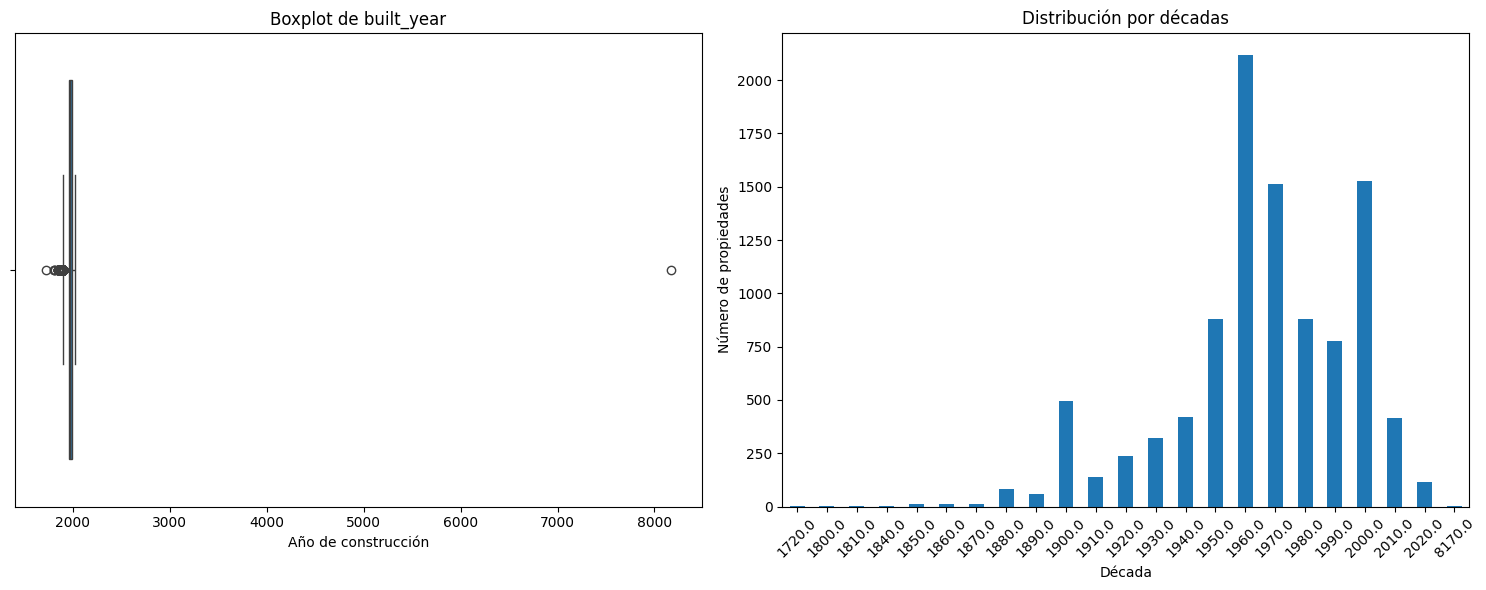

In [127]:
print("\n--- Análisis estadístico de built_year ---")
print(f"Media: {df['built_year'].mean()}")
print(f"Mediana: {df['built_year'].median()}")
print(f"Desviación estándar: {df['built_year'].std()}")
print(f"Mínimo: {df['built_year'].min()}")
print(f"Máximo: {df['built_year'].max()}")
print(f"Rango: {df['built_year'].max() - df['built_year'].min()}")
print(f"Percentil 25%: {df['built_year'].quantile(0.25)}")
print(f"Percentil 75%: {df['built_year'].quantile(0.75)}")

# Top años más frecuentes
top_years = df['built_year'].value_counts().head(10)
print("\nLos 10 años de construcción más frecuentes:")
print(top_years)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot para visualizar outliers
sns.boxplot(x=df['built_year'], ax=axes[0])
axes[0].set_title('Boxplot de built_year')
axes[0].set_xlabel('Año de construcción')

# Histograma por décadas
df['decade'] = (df['built_year'] // 10) * 10
decades_count = df['decade'].value_counts().sort_index()
decades_count.plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribución por décadas')
axes[1].set_xlabel('Década')
axes[1].set_ylabel('Número de propiedades')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

if 'decade' in df.columns:
    df.drop('decade', axis=1, inplace=True)

De la información anterior, sacamos las siguinetes conclusiones:
1. La mediana y el percentil 25% y 75% son muy cercanos al año 1970, por lo que indica que hay muchos edificios construidos en esa época.
2. Hay un valor extremo de 8170, que claramente es un error.
3. Parece también haber algunos outliers en años anteriores al 1850, que se dejarán para preservar contexto histórico.

Entonces, vamos a eliminar esta fila con el valor extremo del año 8170 e imputaremos los valores nulos usando KNN. Lo haremos con este algoritmo ya que coger la media o la mediana cuando hay tantos valores nulos, puede afectar a la distribución.

Para el KNN, veamos la correlación con el resto de variables:

Columna house_type_id codificada con one-hot encoding: 3 nuevas columnas
Columna energy_certificate codificada con one-hot encoding: 9 nuevas columnas

Columnas numéricas válidas para correlación: 37

Top 30 correlaciones con 'built_year':
built_year                      1.000000
n_floors                        0.358472
has_pool                        0.205661
has_parking                     0.200935
is_parking_included_in_price    0.200768
has_green_zones                 0.151061
has_storage_room                0.144615
id                              0.124171
has_terrace                     0.101163
has_fitted_wardrobes            0.099326
has_garden                      0.082523
is_accessible                   0.077237
sq_mt_allotment                 0.076795
has_ac                          0.071328
n_bathrooms                     0.066458
sq_mt_useful                    0.064400
sq_mt_built                     0.056167
floor                           0.031443
n_rooms               

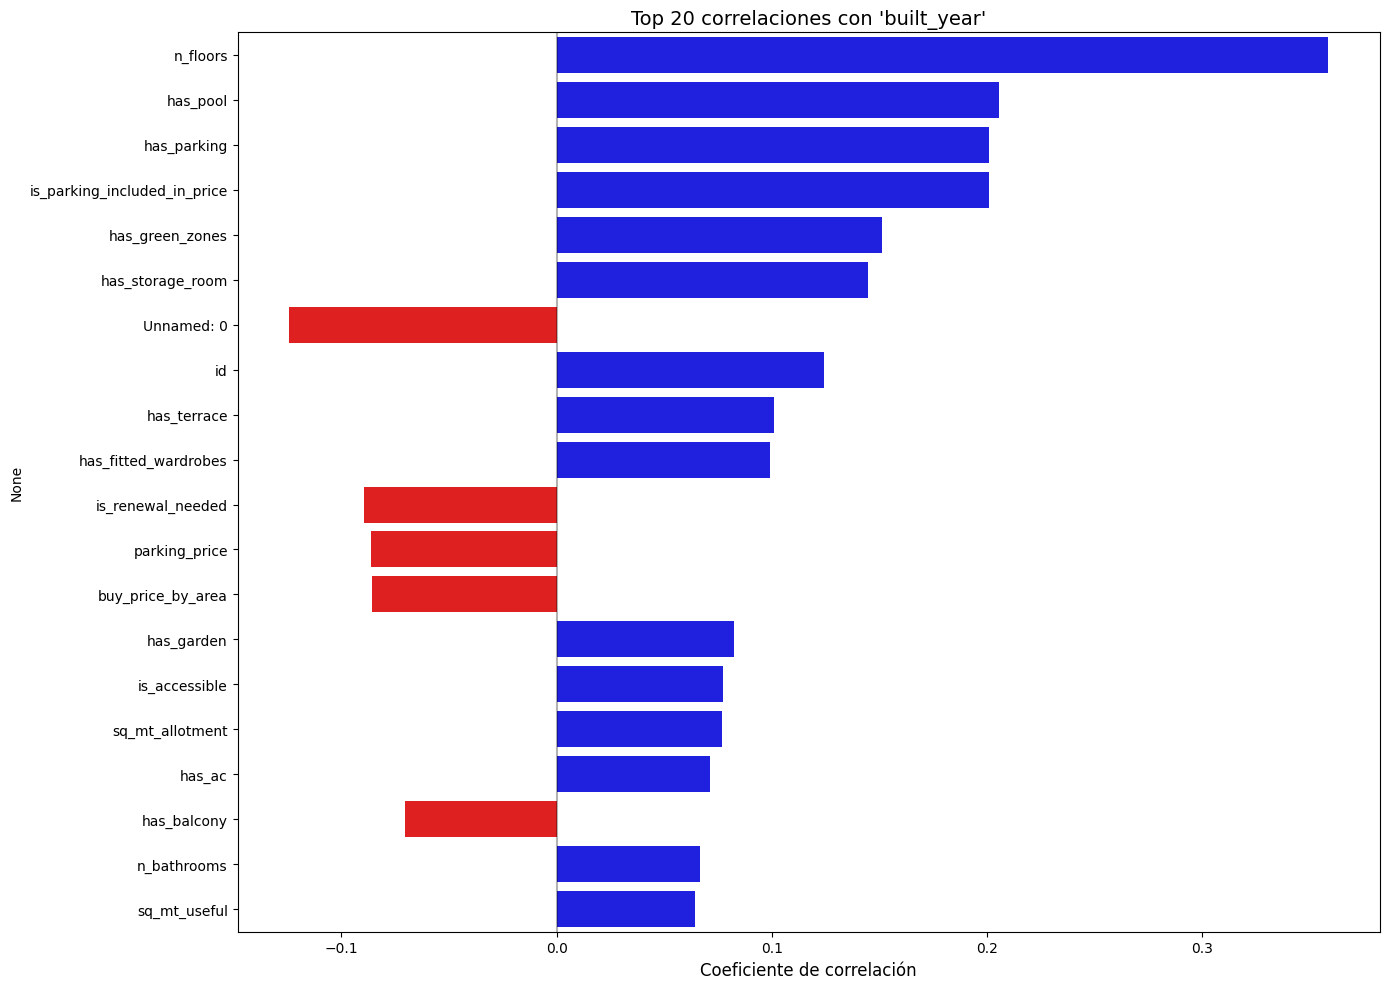

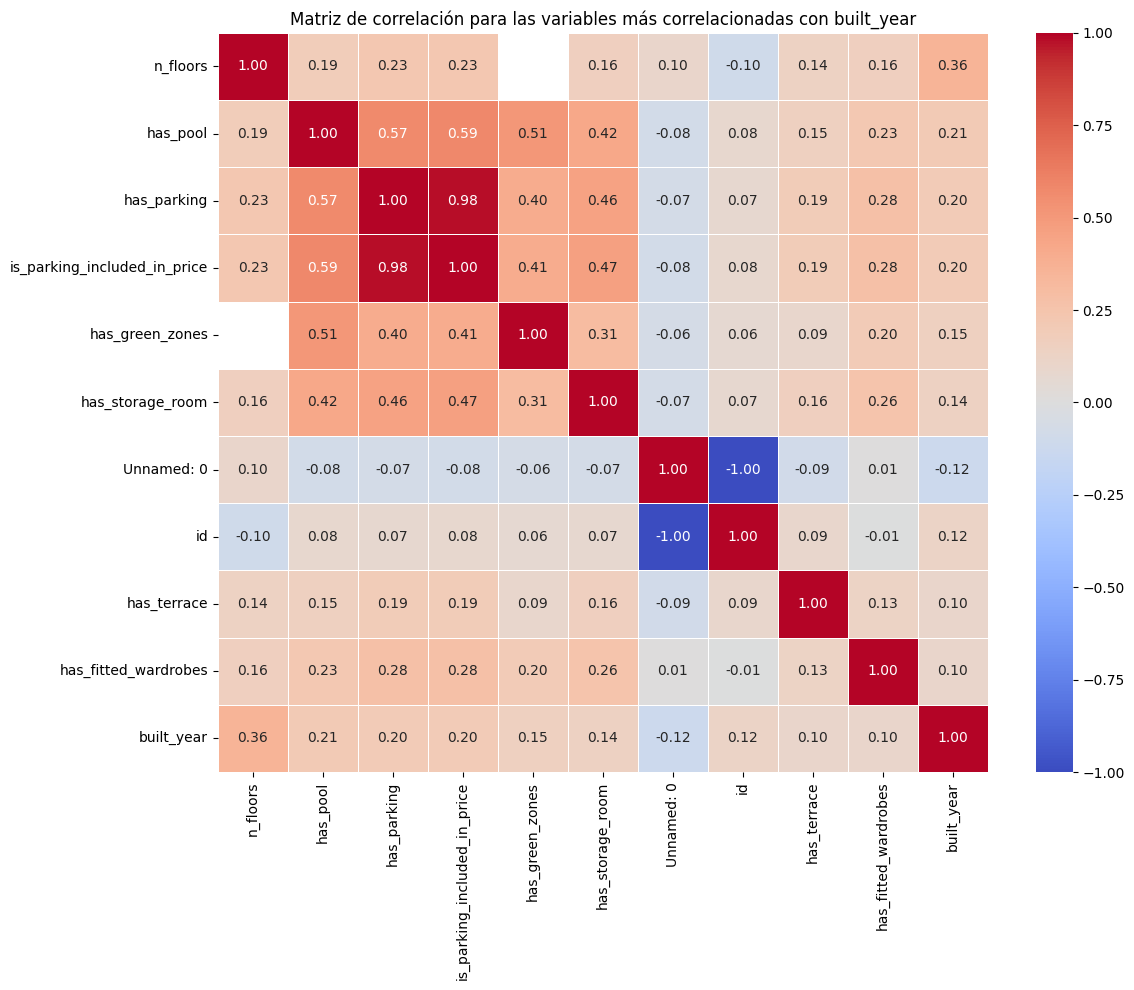

In [111]:
# Volvemos a cargar el dataset completo para analizar correlaciones
df_full = pd.read_csv('../dataset.csv')

# Convertir variables booleanas
boolean_columns = [
    'is_rent_price_known', 'are_pets_allowed', 'is_furnished', 
    'is_kitchen_equipped', 'has_private_parking', 'has_public_parking',
    'is_exterior', 'has_terrace', 'has_balcony'
]

for col in boolean_columns:
    if col in df_full.columns:
        df_full[col] = df_full[col].replace({
            'VERDADERO': 1, 'FALSO': 0, 
            'True': 1, 'False': 0,
            True: 1, False: 0,
            'true': 1, 'false': 0
        })
        df_full[col] = pd.to_numeric(df_full[col], errors='coerce').fillna(-1).astype('float')

# Convertir más columnas categóricas potencialmente booleanas
additional_boolean_columns = [
    'has_central_heating', 'has_individual_heating', 'has_ac',
    'has_fitted_wardrobes', 'has_lift', 'has_garden', 'has_pool',
    'has_storage_room', 'is_accessible', 'has_green_zones',
    'has_parking', 'is_parking_included_in_price',
    'is_orientation_north', 'is_orientation_west', 
    'is_orientation_south', 'is_orientation_east',
    'is_renewal_needed', 'is_new_development', 'is_buy_price_known',
    'is_exact_address_hidden', 'is_floor_under'
]

for col in additional_boolean_columns:
    if col in df_full.columns:
        df_full[col] = df_full[col].replace({
            'VERDADERO': 1, 'FALSO': 0, 
            'True': 1, 'False': 0,
            'Si': 1, 'No': 0,
            'SI': 1, 'NO': 0,
            'YES': 1, 'NO': 0,
            'Yes': 1, 'No': 0,
            'S': 1, 'N': 0,
            'Y': 1, 'N': 0,
            True: 1, False: 0
        })
        df_full[col] = pd.to_numeric(df_full[col], errors='coerce').fillna(-1).astype('float')

# Convertir columnas numéricas que están como object
numeric_object_cols = [
    'floor', 'latitude', 'longitude'
]

for col in numeric_object_cols:
    if col in df_full.columns:
        df_full[col] = pd.to_numeric(df_full[col], errors='coerce')

# Usar one-hot encoding para variables categóricas con pocos valores únicos
categorical_cols = [
    'operation', 'house_type_id', 'energy_certificate', 'neighborhood_id'
]

for col in categorical_cols:
    if col in df_full.columns:
        # Solo codificar si hay menos de 30 categorías para evitar demasiadas columnas
        unique_values = df_full[col].nunique()
        if unique_values < 30 and unique_values > 1:
            # Crear dummies y eliminar una categoría para evitar la trampa de las variables dummy
            dummies = pd.get_dummies(df_full[col], prefix=col, drop_first=True)
            df_full = pd.concat([df_full, dummies], axis=1)
            print(f"Columna {col} codificada con one-hot encoding: {dummies.shape[1]} nuevas columnas")

# Eliminar filas con built_year NaN para la correlación
correlation_df = df_full.dropna(subset=['built_year']).copy()

# Seleccionar solo las columnas numéricas
numeric_cols = correlation_df.select_dtypes(include=['number']).columns
valid_cols = []

for col in numeric_cols:
    # Filtrar columnas con suficientes datos y varianza
    if (correlation_df[col].notna().sum() > 100 and  # al menos 100 valores no nulos
        correlation_df[col].nunique() > 1):          # más de 1 valor único
        valid_cols.append(col)

print(f"\nColumnas numéricas válidas para correlación: {len(valid_cols)}")

# Calcular correlaciones y mostrar top 30
if 'built_year' in valid_cols:
    correlation_matrix = correlation_df[valid_cols].corr(method='pearson')
    built_year_corr = correlation_matrix['built_year'].sort_values(ascending=False)
    
    print("\nTop 30 correlaciones con 'built_year':")
    print(built_year_corr.head(30))
    
    # Visualizar top 20 correlaciones
    plt.figure(figsize=(14, 10))
    top_corrs = built_year_corr.drop('built_year').abs().sort_values(ascending=False).head(20)
    top_corrs_actual = built_year_corr[top_corrs.index]
    
    # Crear un gráfico de barras ordenado por valor absoluto pero mostrando valores reales
    colors = ['red' if x < 0 else 'blue' for x in top_corrs_actual]
    sns.barplot(x=top_corrs_actual.values, y=top_corrs_actual.index, palette=colors)
    plt.title("Top 20 correlaciones con 'built_year'", fontsize=14)
    plt.xlabel("Coeficiente de correlación", fontsize=12)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Crear una matriz de correlación visual para las top variables
    top_cols = list(top_corrs_actual.index[:10]) + ['built_year']
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_df[top_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', 
                linewidths=0.5, center=0)
    plt.title("Matriz de correlación para las variables más correlacionadas con built_year")
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'built_year' no está entre las columnas numéricas válidas")

A continuación aplicamos KNN con las variables más correlacionadas:


Verificando que no queden nulos en las características:
n_floors                        0
has_pool                        0
has_parking                     0
is_parking_included_in_price    0
has_green_zones                 0
has_storage_room                0
has_terrace                     0
has_fitted_wardrobes            0
has_garden                      0
is_accessible                   0
sq_mt_allotment                 0
has_ac                          0
n_bathrooms                     0
is_floor_under                  0
dtype: int64

Porcentaje de valores imputados: 54.01%


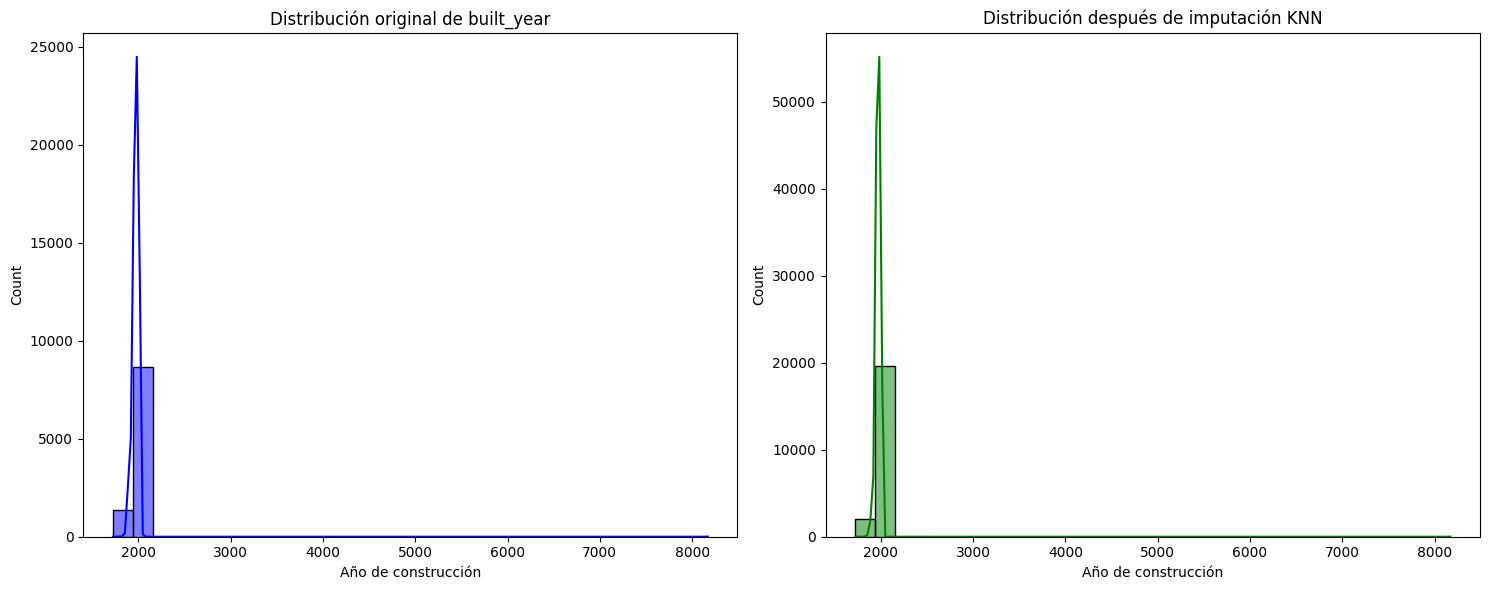

In [128]:
# Seleccionar las características más correlacionadas con built_year para la imputación
features_for_imputation = [
    'n_floors', 'has_pool', 'has_parking', 'is_parking_included_in_price',
    'has_green_zones', 'has_storage_room', 'has_terrace', 
    'has_fitted_wardrobes', 'has_garden', 'is_accessible',
    'sq_mt_allotment', 'has_ac', 'n_bathrooms', 'is_floor_under'
]

# Crear un nuevo DataFrame temporal
# Combinamos las columnas relevantes de df_full con el índice de df
imputation_data = pd.DataFrame(index=df.index)
imputation_data['built_year'] = df['built_year'].copy()

# Añadir las columnas de características desde df_full
for col in features_for_imputation:
    if col in df_full.columns:
        imputation_data[col] = df_full.loc[df.index, col].copy()

available_features = [col for col in features_for_imputation if col in imputation_data.columns]

# Imputar valores nulos en las características (no en built_year)
for col in available_features:
    if imputation_data[col].isnull().sum() > 0:
        # Para características binarias (-1, 0, 1)
        if imputation_data[col].nunique() <= 3:
            most_common = imputation_data[col].mode().iloc[0]
            imputation_data[col].fillna(most_common, inplace=True)
        # Para características numéricas
        else:
            imputation_data[col].fillna(imputation_data[col].median(), inplace=True)

print("\nVerificando que no queden nulos en las características:")
print(imputation_data[available_features].isnull().sum())

# Estandarizar las características para que tengan la misma escala
scaler = StandardScaler()
features_scaled = scaler.fit_transform(imputation_data[available_features])
imputation_scaled = pd.DataFrame(features_scaled, columns=available_features, index=imputation_data.index)
imputation_scaled['built_year'] = imputation_data['built_year']

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=7)
imputed_array = imputer.fit_transform(imputation_scaled)

# Convertir el resultado a DataFrame con los mismos índices
imputed_df = pd.DataFrame(imputed_array, columns=imputation_scaled.columns, index=imputation_scaled.index)

# Guardar una copia de los años originales antes de la imputación
built_year_original = df['built_year'].copy()

# Actualizar SOLO los valores nulos en df
mask_null = df['built_year'].isna()
df.loc[mask_null, 'built_year'] = imputed_df.loc[mask_null, 'built_year']
df['built_year'] = df['built_year'].round().astype(int)

print(f"\nPorcentaje de valores imputados: {mask_null.mean() * 100:.2f}%")

# Visualizar la distribución antes y después de la imputación
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(built_year_original.dropna(), kde=True, bins=30, color='blue')
plt.title('Distribución original de built_year')
plt.xlabel('Año de construcción')

plt.subplot(1, 2, 2)
sns.histplot(df['built_year'], kde=True, bins=30, color='green')
plt.title('Distribución después de imputación KNN')
plt.xlabel('Año de construcción')

plt.tight_layout()
plt.show()

In [129]:
# Eliminamos las posbiles filas que tengan como año de construcción 8170
df = df[df['built_year'] != 8170]

Volvemos a mostrar la información de la variable:


--- Análisis estadístico de built_year ---
Media: 1969.5060484798307
Mediana: 1969.0
Desviación estándar: 25.705597791190023
Mínimo: 1723
Máximo: 2022
Rango: 299
Percentil 25%: 1957.0
Percentil 75%: 1988.0

Los 10 años de construcción más frecuentes:
built_year
1957    901
1970    846
1965    791
1964    711
1960    627
1967    614
1900    447
1951    390
1952    387
1973    376
Name: count, dtype: int64


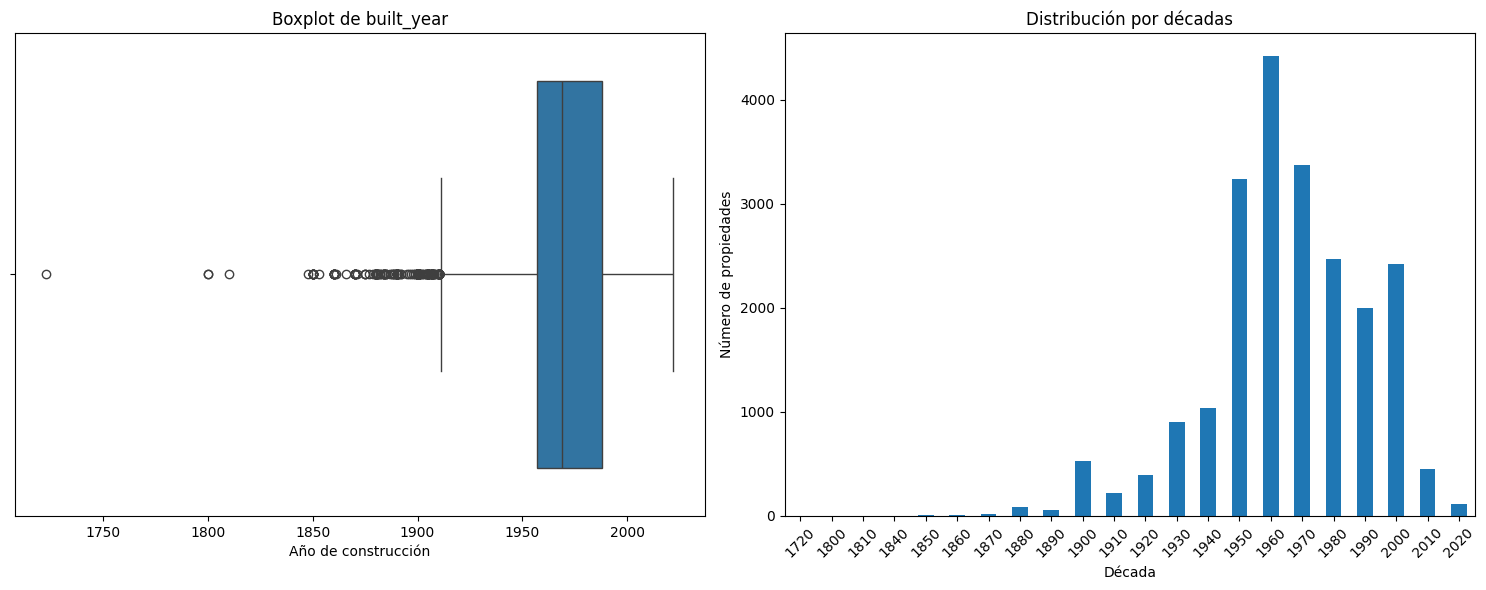

In [130]:
print("\n--- Análisis estadístico de built_year ---")
print(f"Media: {df['built_year'].mean()}")
print(f"Mediana: {df['built_year'].median()}")
print(f"Desviación estándar: {df['built_year'].std()}")
print(f"Mínimo: {df['built_year'].min()}")
print(f"Máximo: {df['built_year'].max()}")
print(f"Rango: {df['built_year'].max() - df['built_year'].min()}")
print(f"Percentil 25%: {df['built_year'].quantile(0.25)}")
print(f"Percentil 75%: {df['built_year'].quantile(0.75)}")

# Top años más frecuentes
top_years = df['built_year'].value_counts().head(10)
print("\nLos 10 años de construcción más frecuentes:")
print(top_years)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot para visualizar outliers
sns.boxplot(x=df['built_year'], ax=axes[0])
axes[0].set_title('Boxplot de built_year')
axes[0].set_xlabel('Año de construcción')

# Histograma por décadas
df['decade'] = (df['built_year'] // 10) * 10
decades_count = df['decade'].value_counts().sort_index()
decades_count.plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribución por décadas')
axes[1].set_xlabel('Década')
axes[1].set_ylabel('Número de propiedades')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

if 'decade' in df.columns:
    df.drop('decade', axis=1, inplace=True)

Comprovamos que se hayan eliminado todos los valores nulos

In [131]:
nulls = df.isnull().mean() * 100
print("Porcentage de nulos por columna:")
display(nulls.sort_values(ascending=False))

Porcentage de nulos por columna:


built_year     0.0
is_exterior    0.0
has_terrace    0.0
has_balcony    0.0
dtype: float64